# Supervised Learning 

<div style="text-align: justify">Supervised learning learns a model from a labeled training data that all(). It is used whenever we want to predict an outcome from a given input.Machine learns to predict these outcome with an Experience. The machine experience to learn from a given input-output pairs. A machine learning model is build from these input/output pairs which is known as training dataset.Our aim is to make output prediction with neverseen input values.</div> 

![figure_2_1.png](images/figure_2_1.png)

<div style="text-align: justify">In chapter 1 we had seen 2 different types of dataset related to machine learning problems: Classification and Regression . In classification the goal is to predict a class label. In figure 1.1 (Chapter 1), we showed an example of  iris dataset which has three class labels(Virginica, setosa and versicolor). In classification we try to predict the class label with an unseen input datapoint.</div>

## Classification for predicting Class Labels

![figure_2_2.png](images/figure_2_2.png)


<div style="text-align: justify"> A classification supervised learning predicts the class labels of new instances based on the past observations. As shown in figure 2.2 , we have 15 samples (training examples) that consists of two classes (positive and negative classes). Each sample consists of two features $x_1$  and $x_2$. We use a supervised learning algorithm to create a decision boundary(green dashed line in the figure 2.2). This decision boundary seperates the two classes +  and - and classify a new new data to any one of those two classes with reference to the decision boundary.Any new sample that falls on the left of the decision boundary would be classified and + class and anything on the right of decision boundary will be classified as - class. </div> 

## Regression for predicting Continuos Outcomes

![figure_2_3.png](images/figure_2_3.png)

<div style="text-align: justify"> Classification supervised learning helps us to predict the discrete outcome. However a second type of supervised learning is to predict the continuous outcomes which is called regression analysis. We try to find the relationship between the target values which are continuous variable and the features in case of regression analysis. In a figure above we can see the relationship between a single feature $x$ and the target value $y$. We fit a straight line to this data that minimizes the distance between the data points and the fiited line . After fitting the line, we can use the intercept and the slope of the line to calculate the target value for an unseen data.</div>

# Linear Regression



## Univariate Linear Regression

A simple univariate linear regression is to model the relationship between a single feature $x$ and continuous valued target $y$ (see Figure 2.3). The equation of a linear model with one explanatory varibale is defined as follows 
$$y = w_{0}+w_{1}x$$
In the equation above,$w_{0}$ is the y intercept and $w_{1}$ is the weight coefficient of variable $x$. In linear regression, our aim is to learn the weight $w_{0}$ and $w_{1}$ so that we can cleary establish the relationship between the dependent varibale(feature) $x$ and independent variable(target) $y$.
![figure_2_4.png](images/figure_2_4.png)

Here $\hat{y}$ is the predicted target/output value which can be calculated by learning the coefficients/weight  $w_{0}$ and $w_{1}$ 

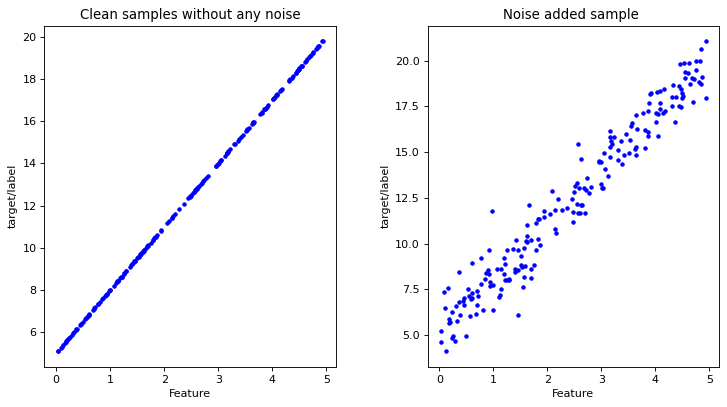

In [2]:
# Let us generate a random dataset .. we are going to use numpy library to generate random numbers
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42) # seed value = 42 


x=5*np.random.rand(200,1)# let us randomly generate single feature x (for univariate we just need single feature) 
y_clean =5+3*x  # let us generate target values y  mapped by equation  y=mx +c where m =3 and c =5 
y_noise = 5+3*x+np.random.randn(200,1) # we added some noise to y_clean


#plotting
fig,axs=plt.subplots(1,2,figsize=(10,6),dpi=80,facecolor='w',edgecolor='k') 
axs[0].set_xlabel("Feature")
axs[0].set_ylabel("target/label")
axs[0].title.set_text("Clean samples without any noise")

axs[1].set_xlabel("Feature")
axs[1].set_ylabel("target/label")
axs[1].title.set_text("Noise added sample ")

axs[0].plot(x,y_clean,'b.') 
axs[1].plot(x,y_noise,'b.')

fig.tight_layout(pad=4.0)

<div style="text-align: justify"> In above figure , we can see the difference between two different  data samples point y_clean and y_noise. The clean one follows a straight line  where as noisey doesnot accurately follows a straight line. Our attempt would be to fit y_noise and x using linear regression such that we can closely approximate the samples that resembles noise free.</div>  

In [3]:
from sklearn.linear_model import LinearRegression  # Import Linearregression from sklearn
linear_reg= LinearRegression() # instantiate the class 
linear_reg.fit(x,y_noise) # use fit method 
print(f"The y-intercept of fitted sample is {linear_reg.intercept_[0]} ") # get attributes intercept
print(f"The slope of fitted sample is {linear_reg.coef_[0][0]}") # get attributes coefficient

The y-intercept of fitted sample is 5.105201150960828 
The slope of fitted sample is 2.9843857863650034


<div style="text-align: justify"> Now we have fitted the noisey samples , we can observe the y-intercept and slope closely resembles with noise free or clean samples(y_clean =5*x+3). Now that we have obtained the optimal parameters y-intercept and slope, its time to make prediction with new data (feature) that our model has not used during the training phase. We call it as a test data sample.</div> 

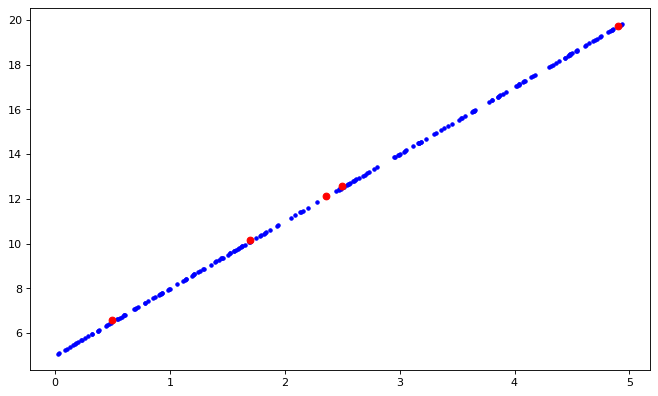

In [4]:
x_test= np.array([[2.36],[1.7],[4.9],[2.5],[0.5]]) # creating 5  test sample points 
y_predict=linear_reg.predict(x_test) # use predict method to predict the target values  for x_test
plt.figure(figsize=(10,6),dpi=80)
plt.plot(x,y_clean,'b.') # .b creates blue point marker
plt.plot(x_test,y_predict,'ro') # .r0 creates red  circle marker


We can see how those predicted samples(red-dots) falls on the straight line(blue dots).

## Multivariate Linear Regression
 So we have now able to understand the linear regression in a univariate(a single feature or dependent variable ).We can also generalize the linear regression model for multiple explanatory variables(multiple features) as given below
$$y = w_{0}x_{0}+w_{1}x_{1}+w_{2}x_{2}+..........+w_{n}x_{n}=\sum_{i=0}^{n} w_{i}x_{i}$$
![figure_2_5.png](images/figure_2_5.png)

In [5]:
# Let us generate a random sample which has two feature
# Just like univariate example above we are going to  generate clean and noisy samples and  multivariate with two dependent
# variable x amd x**2 and constant(bias) 3.

# features  
#from mpl_toolkits import mplot3d


x_1=10*np.random.rand(200,1)-2 #create first feature 
x_2=15*np.random.rand(200,1)-1 # create second feature 
y_multi_noise=0.5*x_1+x_2+3+np.random.randn(200,1) # map two feature x_1 and x_2  and add some noise  
y_multi_clean =0.5*x_1+x_2+3 
x_multi=np.c_[x_1,x_2] #concatenate two vectors x_1 and x_2  column wise 

                                                               
# fig=plt.figure(figsize=(10,6),dpi=100)
# ax=fig.add_subplot(111,projection='3d')
# ax.scatter3D(x_multi[:,0],x_multi[:,1],y_multi,'gray')
# ax=fig.add_subplot(121,projection='3d')
# ax.scatter3D(x_multi[:,0],x_multi[:,1],y_multi_noise,'gray')




In [6]:
linear_reg_multi=LinearRegression()
linear_reg_multi.fit(x_multi,y_multi_noise)


LinearRegression()

In [7]:
print (f"the constant is {linear_reg_multi.intercept_[0]}")
print(f"the coefficients are {linear_reg_multi.coef_[0]}")       

the constant is 2.83796265716256
the coefficients are [0.51877063 1.01785794]


Now let  us compare the fitted constant and coefficients values with y_multi_clean. Is it similar?. Similar to Univariate Linear regression, now we can use predict method to predict output/target values with the unseen datapoints. This would be the exercise problem for students.

# Logistic Regression

<div style="text-align: justify">Now that we have understanding of Linear regression , it is time to understand the classification problems. Logistic regression is powerful algorithm for linear and binary classification problems.Inspite of the name logistic regression , it is not a model for regression but a model for classification.Logestic regression performs well on linearlly seperated classes.
To understand the idea of logistic regression,let us start with a probabilistc model for a binary classification. In binary classification, we have two classes(positive event and negative event or let us say 1 and 0 ). The probability of positive event is $p$.The log-odds $\dfrac{p}{(1-p)}$ is the ratio of probability for positive event(1) and negative event(0).The probability value ranges from 0 to 1. The logit function which is the logarithm of log-odds is given as 
$$logit(p)=log \dfrac{p}{(1-p)}$$.
The logit function takes the input values from 0 to 1(Probability range) and convert them to entire real number range which can be use to express a linear relationship between feature values and the log-odds. The relationship is established as shown below:

$$logit(p(y=1|x)) = w_{0}x_{0}+w_{1}x_{1}+w_{2}x_{2}+..........+w_{n}x_{n}=\sum_{i=0}^{n} w_{i}x_{i}$$
$p(y=1|X)$ (read as probability of 1 given ${X}$) is the conditional probability the particular datapoint(examples) belongs to class 1 given its feature vector <b>X</b>, where <b>X</b>=$[x_{0},x_{1},x_{2},..........,x_{n}]$.The weight vector <b>W</b> is given as  <b>W</b>=$[w_{0},w_{1},w_{2},..........,w_{n}]$.
 
Now we know that a logit function can transform probability values ranging from 0 to 1 to real number range,question is  what does inverse of  logit function does? A inverse logit function takes a real number range($-\infty ,\infty$) and transforms it to a probability values [0 to 1]. The inverse logit function is also called logistic sigmoid function and is defined as
$$\sigma(z)=\dfrac{1}{1+e^{-z}} $$

${z}$ is the dot product of the transpose of weight vector(<b>W</b>) and input feature vector(<b>X</b>) and is given as 
$$ z= w_{0}x_{0}+w_{1}x_{1}+w_{2}x_{2}+..........+w_{n}x_{n}=W^{T}X $$.
![figure_2_6.png](images/figure_2_6.png)</div>



For explaining logistic regression, we are going to import popular iris dataset from sci-kit learn library 

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import pandas as pd 

In [9]:
iris_data=load_iris() # instantiate load_iris class
X= iris_data.data  # Load all the features to X 
y=iris_data.target # load all the target values to y

In [10]:
X_df=pd.DataFrame(X,columns=iris_data.feature_names)

In [11]:
print(X_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [12]:
dataset = pd.concat([X_df,pd.DataFrame(y,columns=['target'])],axis=1)
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<div style="text-align: justify">Let us look at the dataframe above. We have four features sepal length , sepal width , petal length , petal width and target values are under the column name target. We have three different target values (0,1,2).(Note:You cannot see 1 in the dataset above as panda does not print all the datapoints in the jupyter notebook. Three dots(...) in the dataframe above means there are datapoints between row number 4 and row number 145). So this is the classification task because we need to fit the datapoints for different classes.</div>

Now we are going to split our whole data into training and test set as shown in the figure below.(More detail about splitting can be found in chapter 5). we are going to import train_test_split from scikit learn library.
![figure_5_1.png](images/figure_5_1.png) 


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) # so 20% of dataset is used as test set 
classifier=LogisticRegression(random_state=42)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=42)

<div style="text-align: justify">We always use fit method to our training set data (X_train and y_train). The fit method calculates the optimal parameters that are needed to fit the features with the target values .
Those optimal parameters are then again use to predict the target values for X_test. You might wonder why there is need to calculate the target values when we already have those target values(y_test)? The reason is we need to evaluate our model performace(How good our model is ?). So calculated target values are called predicted target values. We are going to discuss about model evaluation(How good out model is ? ) in chapter 5 .</div>

In [14]:
y_predicted_test =classifier.predict(X_test) # this is the predicted y_test
print(y_predicted_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


Now we have predicted y_test and known y_test, we are going to compare them .

In [15]:
import numpy as np 
np.array_equal(y_predicted_test,y_test) # this actually checks if the two arrays are equal or not and returns True if they are equal. 

True

<div style="text-align: justify">Now we see that our predicted target values and known target values are equal , we  can consider the model actually predicted the all the target values correctly . Since logistic regression calculates the probability for the classes that belongs to some datapoint , we are going to observe the probability for X_test using attribute predict_proba().</div>

In [16]:
classifier.predict_proba(X_test)

array([[3.78537469e-03, 8.27203947e-01, 1.69010678e-01],
       [9.46715253e-01, 5.32845465e-02, 2.00039472e-07],
       [8.72555158e-09, 1.55683183e-03, 9.98443159e-01],
       [6.43467244e-03, 7.92121359e-01, 2.01443969e-01],
       [1.44109120e-03, 7.74296360e-01, 2.24262549e-01],
       [9.55766849e-01, 4.42329740e-02, 1.76928107e-07],
       [7.76177478e-02, 9.08073482e-01, 1.43087699e-02],
       [1.61427494e-04, 1.55687681e-01, 8.44150892e-01],
       [2.20789543e-03, 7.62694560e-01, 2.35097545e-01],
       [2.83189883e-02, 9.45786180e-01, 2.58948314e-02],
       [4.39757124e-04, 2.43328437e-01, 7.56231806e-01],
       [9.68308143e-01, 3.16917785e-02, 7.81101938e-08],
       [9.72932013e-01, 2.70679540e-02, 3.33521073e-08],
       [9.62095351e-01, 3.79045384e-02, 1.10979946e-07],
       [9.79266302e-01, 2.07336336e-02, 6.47580505e-08],
       [4.54261283e-03, 7.12668759e-01, 2.82788628e-01],
       [7.22859902e-06, 2.42113836e-02, 9.75781388e-01],
       [2.73339125e-02, 9.47677

<div style="text-align: justify">In the above matrix columns from left to right are the probabilites for target/class 0,1 and  and the rows represents probability for particular data points. Now lets use compare this probability matrix with the predicted target values y_predicted_test. so in the first row the maximum probability is 8.27203947e-01 which corresponds to class 1. Similarly in the second row the maximum probability is 9.46715253e-01 which corresponds to class 0. We can thus conclude that logistic regression assing the class which has maximum probability for a particular datapoint.</div> 

# Cost Functions / Loss Functions
 

<div style="text-align: justify">One of benefit of using supervised learning is that we have target values.The question is how a supervised ML agorithm find the right coefficients(as we saw in the code example for Linear regression). Answer is the "Third Component of Machine Learning(chapter -1)" . A loss function computes the error signal which is the difference between the predicted target and known target value. Unless the  model converges(i.e my error signal becomes 0 or near to 0), ML algorithm keeps on updating the coefficients iteratively. </div>

![figure_2_7.png](images/figure_2_7.png)

<div style="text-align: justify">A loss function is calculated for a single example(sample/datapoint) where as cost function is the average loss function over all the samples/ datapoints. Cost function and loss function are used interchangeably in most of the course book and through out this course. In figure 2.7 , an optimization algorithm called gradient descent is shown(We wont go too much in  mathematical details of gradient descent). Think gradient as the slope at any point in the curve shown above. Our attempt is to converge cost function $J(w)$  to zero or atleast minimize $J(w)$.(However $J(w)$ =0 might not be possible  ). So what is the slope of the curve at which $J(w)$ is minimium ?  It is 0. So gradient descent is the process of finding the value of $w$ for which $J(w)$ is minimize  which is known as Global Cost Minimum ($J_{min}(w)$) as shown in the figure above. We randomly choose the initial weight and make our way down the hill(shown as arrow in the figure) until we find the global cost minimum ($J_{min}(w)$)</div>
Now in the next section we will talk about the cost function that we use for supervised ML agorithm : Mean Square Error(MSE) for Linear Regression and Log-Likelihood Function for logistic Regression

## Mean Square Error : Linear Regression


MSE is the quantitative measure of a model's performance  which is the averaged value of the sum square errors, so it got the name Mean Squared Error. A linear regression uses MSE as its cost function to find the optimal paramenters or coefficients($w$). MSE is defined as 
$$MSE =  J{(w)} = \frac{1}{n}  \sum_{i=1}^{n}  (\hat{y}_i -y_i)^2                     $$

In equation(7) , the index $i$ is the instance of sample amd $n$ is the total number of samples/examples. $y_i$ is known target values and $\hat{y}_i$ is predicted value. In equation 7 , when the predicted target $\hat{y}_i$ approaches close to known  target $y_i$  or let us say $\hat{y}_i \approx  y_i $, then $MSE =  J{(w)} \approx 0   $ . This exactly satisfy the condition to get Global Cost Minimum ($J_{min}(w)$).

## Log-Likelihood Function : Logistic Regression

 We do not use MSE as a cost function for logistic regression as this would give non-convex cost function which would result in local maxima and local minima . We know that we can use logistic regression model to predict probabilites and class labels. From equation(6) and equation(7), we can write 
 
 $$\sigma(z)=\dfrac{1}{1+e^{-w_{0}x_{0}-w_{1}x_{1}-w_{2}x_{2}-..........-w_{n}x_{n}}}= \dfrac {1}{1+e^{-W^{T}X}} $$
 
 where $W=[w_{0},w_{1}........,w_{n}]$ and $X=[x_{0},x_{1}........,x_{n}]$. $W^{T}$ is the transpose of $W$.
 
 The logistic loss is defined as :
 
$$  (1/m) \sum_{i=1}^{n}\big[ -y^{(i)}\ln\big(\sigma(\mathbf{w}^{T}\mathbf{x}^{(i)})\big)-(1-y^{(i)})\ln\big(1-\sigma(\mathbf{w}^{T}\mathbf{x}^{(i)})\big) \big] $$

# Exercise For Students

## Linear Regression 

In [17]:
from sklearn.datasets import make_regression # please refer: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html
from sklearn.linear_model import LinearRegression

# TO DO By Students: 
# Instantiate make_regression(use random_state=100) 
# train and test split the data(20% test)
# Use Linear regression 
# plot (y_test and y_predict) and make observation. What do you see?
#START YOUR CODE DOWN BELOW IN THIS CELL


## Logistic Regression

In [18]:
from sklearn.datasets import load_breast_cancer  # like iris in example we are going to use breast cancer data
                                                 # Refer sklearn documentation https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



## TO DO BY STUDENT 
# Instantiate load_breast_cancer to an object and get the features and target values
# Split the data into train and test (10% test )
# Use Logistic Regression 
# START YOUR CODE DOWN BELOW IN THIS CELL 
